In [2]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [172]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import AllChem
from utils import MonomersLib, HELMConverter, draw_mol, get_main_mol, remove_isotopes, is_same_mol

lib = MonomersLib()
monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library.xml"
lib.load_xml(monomers_lib_path)
monomers_lib_path = molgen_path + "data/helm/library/modan.json"
lib.load_json(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[03:37:28] WARNING: not removing hydrogen atom with dummy atom neighbors
[03:37:28] WARNING: not removing hydrogen atom with dummy atom neighbors
[03:37:28] WARNING: not removing hydrogen atom with dummy atom neighbors
[03:37:28] WARNING: not removing hydrogen atom with dummy atom neighbors


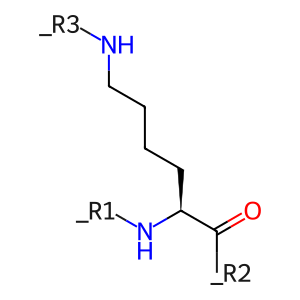

In [185]:
# helm = "PEPTIDE1{[S5Left]}|PEPTIDE1{[S5Right]}|PEPTIDE1{[R8]}|}$$$$"
# helm = "PEPTIDE1{[Aib]}|PEPTIDE1{[Dab]}|PEPTIDE1{[Orn]}|}$$$$"
# helm = "PEPTIDE1{[Ac5c]}|PEPTIDE1{[Ac6c]}}$$$$"
# helm = "PEPTIDE1{[OAllylHse]}}$$$$"
# helm = "PEPTIDE1{[Pentanoyl]}|PEPTIDE1{[Dodecanoyl]}|PEPTIDE1{[Octadecanoyl]}}$$$$"
# helm = "PEPTIDE1{J}}$$$$"
helm = "PEPTIDE1{K}}$$$$"
mol = converter._convert(helm, close=False)
draw_mol(mol, 300, 300)

In [176]:
import re

def split_modan_pep_seq(seq: str) -> list[str]:
    if seq.startswith("H-"):
        seq = seq[2:]
    pattern = (
        r"("
        r"\-"
        r"|NH2|X0|X0=|X1|X2|S5|R8"
        r"|Ac|CH3\(CH2\)4CO|CH3\(CH2\)10CO|CH3\(CH2\)16CO"
        r"|[A-Z]"
        r"|[a-z]"
        r")"
    )
    tokens = re.findall(pattern, seq)
    #assert seq == "".join(tokens)
    return tokens

def helm_from_modan_pep_seq(seq: str) -> str:
    #TODO: what is "J"? (placeholder: I)
    token_dict = {"g": "G", #G doesn't have D-form
        "B": "[Ac5c]", "O": "[Orn]", "U": "[Aib]", "Z": "[Ac6c]", 
        "X0": "[OAllylHse]", "X0=": "[OAllylHse]", "X1": "[Dab]", "X2": "[Sar]", 
        "NH2": "[am]", "Ac": "[ac]",
        "CH3(CH2)4CO": "[Pentanoyl]", "CH3(CH2)10CO": "[Dodecanoyl]", "CH3(CH2)16CO": "[Octadecanoyl]"}
    seq_list = split_modan_pep_seq(seq)
    bridge_left_idx = bridge_right_idx = -1
    monomer_idx = 1
    helm = "PEPTIDE1{"
    for t in seq_list:
        if t == "-":
            continue
        elif t == "S5":
            if bridge_left_idx == -1:
                bridge_left_idx = monomer_idx
                helm += "[S5Left]."
            else:
                bridge_right_idx = monomer_idx
                helm += "[S5Right]."
        elif t == "R8":
            bridge_left_idx = monomer_idx
            helm += "[R8]"
        else:
            if t in token_dict:
                helm += token_dict[t] + "."
            else:
                if t.isupper():
                    helm += t + "."
                else:
                    helm += "[d" + t.upper() + "]."
        monomer_idx += 1
    if bridge_left_idx == -1:
        helm = helm[:-1] + "}$$$$"
    else:
        helm = helm[:-1] + "}$"
        helm += "PEPTIDE1,PEPTIDE1," + str(bridge_left_idx) + ":R3-" + str(bridge_right_idx) + ":R3$$$"
    return helm

pep_seq = "CH3(CH2)10CO-S5IKKS5LKSAKKFVKAFK-NH2"
pep_seq = "H-GIKKFLKSUHHFVHUFH-NH2"
#split_modan_pep_seq(pep_seq)
helm_from_modan_pep_seq(pep_seq)

'PEPTIDE1{G.I.K.K.F.L.K.S.[Aib].H.H.F.V.H.[Aib].F.H.[am]}$$$$'

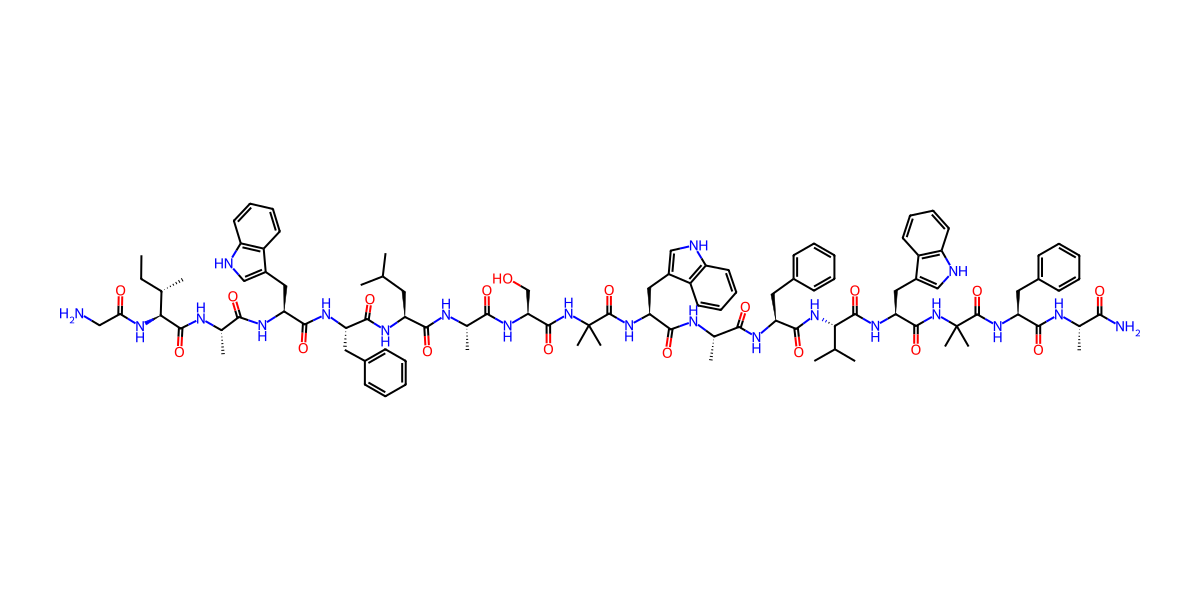

PEPTIDE1{G.I.K.W.F.L.K.S.[Aib].W.K.F.V.W.[Aib].F.K.[am]}$$$$


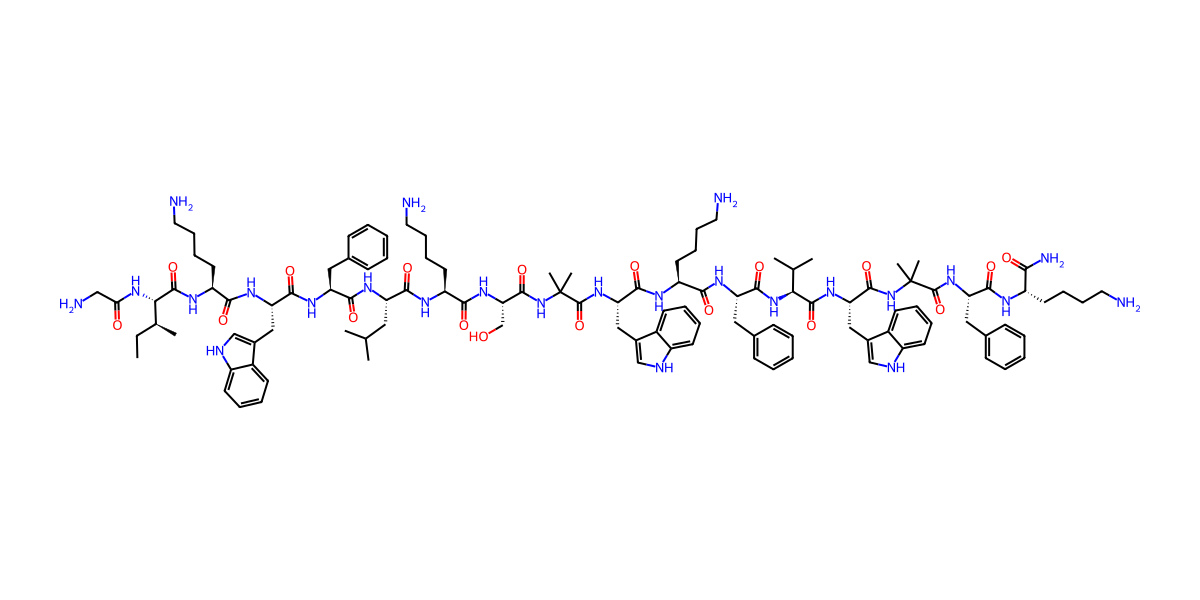

False


In [ ]:
width, height = 1200, 600
#pep, smiles = "H-GIJJFLJSUKKFVKUFK-NH2", "[H]NCC(N[C@]([C@@H](C)CC)([H])C(N[C@@H](CCN)C(N[C@@H](CCN)C(N[C@H](C(N[C@@H](CC(C)C)C(N[C@@H](CCN)C(N[C@@H](CO)C(NC(C(N[C@@H](CCCCN)C(N[C@@H](CCCCN)C(N[C@H](C(N[C@@H](C(C)C)C(N[C@@H](CCCCN)C(NC(C(N[C@H](C(N[C@@H](CCCCN)C(N)=O)=O)CC1=CC=CC=C1)=O)(C)C)=O)=O)=O)CC2=CC=CC=C2)=O)=O)=O)(C)C)=O)=O)=O)=O)CC3=CC=CC=C3)=O)=O)=O)=O"
pep, smiles = "H-GIOOFLKSUOOFVOUFO-NH2", "[H]NCC(N[C@]([C@@H](C)CC)([H])C(N[C@@H](CCCN)C(N[C@@H](CCCN)C(N[C@H](C(N[C@@H](CC(C)C)C(N[C@@H](CCCN)C(N[C@@H](CO)C(NC(C(N[C@@H](CCCN)C(N[C@@H](CCCN)C(N[C@H](C(N[C@@H](C(C)C)C(N[C@@H](CCCN)C(NC(C(N[C@H](C(N[C@@H](CCCN)C(N)=O)=O)CC1=CC=CC=C1)=O)(C)C)=O)=O)=O)CC2=CC=CC=C2)=O)=O)=O)(C)C)=O)=O)=O)=O)CC3=CC=CC=C3)=O)=O)=O)=O" #K
pep, smiles = "H-GIKWFLKSUWKFVWUFK-NH2", "[H]NCC(N[C@]([C@@H](C)CC)([H])C(N[C@H](C(N[C@H](C(N[C@H](C(N[C@@H](CC(C)C)C(N[C@H](C(N[C@@H](CO)C(NC(C(N[C@H](C(N[C@H](C(N[C@H](C(N[C@@H](C(C)C)C(N[C@H](C(NC(C(N[C@H](C(N[C@H](C(N)=O)C)=O)CC1=CC=CC=C1)=O)(C)C)=O)CC2=CNC3=C2C=CC=C3)=O)=O)CC4=CC=CC=C4)=O)C)=O)CC5=CNC6=C5C=CC=C6)=O)(C)C)=O)=O)C)=O)=O)CC7=CC=CC=C7)=O)CC8=CNC9=C8C=CC=C9)=O)C)=O)=O" #K
mol_s = Chem.MolFromSmiles(smiles)
draw_mol(mol_s, width=width, height=height)

helm = helm_from_modan_pep_seq(pep)
print(helm)
mol_h = converter.convert(helm)
draw_mol(mol_h, width=width, height=height)
print(is_same_mol(mol_s, mol_h))

In [178]:
import pandas as pd

modan_raw_path = molgen_path + "data/misc/Dataset_MODAN_initial.xlsx"
df = pd.read_excel(modan_raw_path, sheet_name="Sheet1", index_col=0)

for idx, r in df.iterrows():
    pep = r["Peptide sequence"]
    smiles = r["SMILES"]
    helm = helm_from_modan_pep_seq(pep)
    mol_h = converter.convert(helm)
    mol_s = Chem.MolFromSmiles(smiles)
    if not is_same_mol(mol_h, mol_s):
        print("unmatch: ", idx, pep, smiles)

unmatch:  11 H-KKX0UKKX0U-NH2 [H]N[C@@H](CCCCN)C(N[C@@H](CCCCN)C(N[C@@H](CCOCC=C)C(NC(C(N[C@@H](CCCCN)C(N[C@@H](CCCCN)C(N[C@@H](CCOCC=C)C(NC(C(N)=O)(C)C)=O)=O)=O)=O)(C)C)=O)=O)=O
unmatch:  12 H-KKX0=UKKX0=U-NH2 [H]N[C@@H](CCCCN)C(N[C@@H](CCCCN)C(N[C@@H](CCOC/C=C\COCC[C@@H](C(NC(C(N)=O)(C)C)=O)NC([C@H](CCCCN)N1)=O)C(NC(C(N[C@@H](CCCCN)C1=O)=O)(C)C)=O)=O)=O
unmatch:  44 H-GIOOFLKSUOOFVOUFO-NH2 [H]NCC(N[C@]([C@@H](C)CC)([H])C(N[C@@H](CCCN)C(N[C@@H](CCCN)C(N[C@H](C(N[C@@H](CC(C)C)C(N[C@@H](CCCN)C(N[C@@H](CO)C(NC(C(N[C@@H](CCCN)C(N[C@@H](CCCN)C(N[C@H](C(N[C@@H](C(C)C)C(N[C@@H](CCCN)C(NC(C(N[C@H](C(N[C@@H](CCCN)C(N)=O)=O)CC1=CC=CC=C1)=O)(C)C)=O)=O)=O)CC2=CC=CC=C2)=O)=O)=O)(C)C)=O)=O)=O)=O)CC3=CC=CC=C3)=O)=O)=O)=O
unmatch:  57 H-GIKWFLKSUWKFVWUFK-NH2 [H]NCC(N[C@]([C@@H](C)CC)([H])C(N[C@H](C(N[C@H](C(N[C@H](C(N[C@@H](CC(C)C)C(N[C@H](C(N[C@@H](CO)C(NC(C(N[C@H](C(N[C@H](C(N[C@H](C(N[C@@H](C(C)C)C(N[C@H](C(NC(C(N[C@H](C(N[C@H](C(N)=O)C)=O)CC1=CC=CC=C1)=O)(C)C)=O)CC2=CNC3=C2C=CC=C3)=O)=O)CC4=CC=CC